In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec

In [3]:
def rain_op(data):    
    Hs = []
    delta,dura = 1, len(data)
    for i in range(dura//delta):
        Hs.append(data[i])
    tsd = Hs
    ts = []
    for i in range(dura//delta):
        t = i*delta
        key = '08/28/2015 '+str(9+t//60).zfill(2)+':'+str(t % 60).zfill(2)+':'+'00'#'08/28/2015 '+str(9+t//60).zfill(2)+':'+str(t % 60).zfill(2)+':'+'00'
        ts.append([key,tsd[i]])
    return ts

In [26]:
rd = np.load('step0-knowledge\\rainfall\\normlized_rainfall.npy').tolist()
erd = np.load('step0-knowledge\\rainfall\\normlized_realrainfall.npy').tolist()

raindata = []
for i in range(len(rd)):
    tem =[]
    for j in rd[i]:
        tem.append(str(float(j[1])))
    temrd = rain_op(tem)
    raindata.append(temrd)

exraindata = []
for i in range(len(erd)):
    tem =[]
    for j in erd[i]:
        tem.append(str(float(j[1])))
    temrd = rain_op(tem)
    exraindata.append(temrd)

In [27]:
realrainid = [10,20,30,40,50,60]
exrainid = [1,2,3,4]
rainid = realrainid + exrainid

# Rainfall fig, 8 hours in total, 1 hour ahead, 2 hours rainfall, 5 hours behind

In [28]:
temahead = [0 for _ in range(60)]
temabehind = [0 for _ in range(60)]
figdata = {}
kid = 0
for id in realrainid:
    tem = []
    for it in raindata[kid]:
        tem.append(float(it[1]))
    figdata['rain'+str(id)] = temahead + tem + temabehind
    kid += 1

kid = 0
for id in exrainid:
    tem = []
    for it in exraindata[kid]:
        tem.append(float(it[1]))
    figdata['rain'+str(id)] = temahead + tem + temabehind
    kid += 1

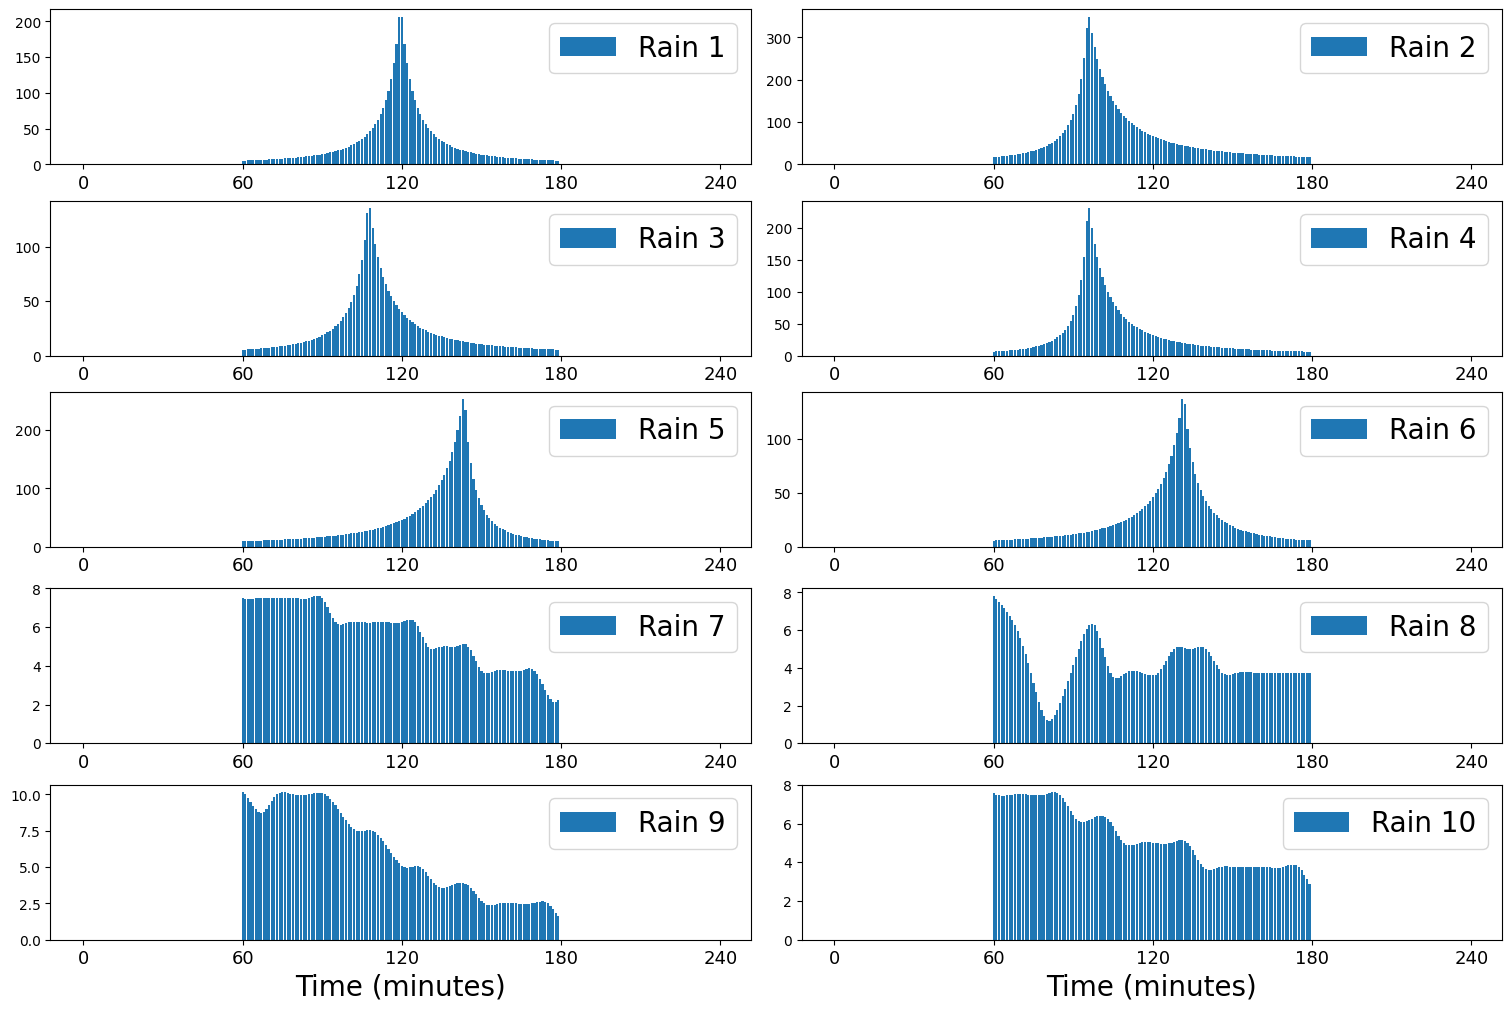

In [29]:
title_font = {'size':'20'}
title_font2 = {'size':'20'}
title_font3 = {'size':'13'}
title_font4 = {'size':'20'}

fig = plt.figure(dpi=100,constrained_layout=True,
                 figsize=(15,10)
                )
                #constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
gs = GridSpec(5, 2, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

xtick_x=[0,60,120,180,240]

ax = fig.add_subplot(gs[0, 0])
ax.bar([x for x in range(len(figdata['rain10']))],figdata['rain10'],label='Rain 1')
#ax.set_title('Rain 1',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[0, 1])
ax.bar([x for x in range(len(figdata['rain20']))],figdata['rain20'],label='Rain 2')
#ax.set_title('Rain 2',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[1, 0])
ax.bar([x for x in range(len(figdata['rain30']))],figdata['rain30'],label='Rain 3')
#ax.set_title('Rain 3',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[1, 1])
ax.bar([x for x in range(len(figdata['rain40']))],figdata['rain40'],label='Rain 4')
#ax.set_title('Rain 4',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[2, 0])
ax.bar([x for x in range(len(figdata['rain50']))],figdata['rain50'],label='Rain 5')
#ax.set_title('Rain 5',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[2, 1])
ax.bar([x for x in range(len(figdata['rain60']))],figdata['rain60'],label='Rain 6')
#ax.set_title('Rain 6',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

# Real rainfall
ax = fig.add_subplot(gs[3, 0])
ax.bar([x for x in range(len(figdata['rain1']))],figdata['rain1'],label='Rain 7')
#ax.set_title('Rain 7',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[3, 1])
ax.bar([x for x in range(len(figdata['rain2']))],figdata['rain2'],label='Rain 8')
#ax.set_title('Rain 8',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
#ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[4, 0])
ax.bar([x for x in range(len(figdata['rain3']))],figdata['rain3'],label='Rain 9')
#ax.set_title('Rain 9',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
ax.set_xlabel('Time (minutes)',fontdict=title_font)

ax = fig.add_subplot(gs[4, 1])
ax.bar([x for x in range(len(figdata['rain4']))],figdata['rain4'],label='Rain 10')
#ax.set_title('Rain 10',fontdict=title_font2, loc='right')
ax.legend(fontsize=title_font4['size'])
ax.set_xticks(xtick_x,xtick_x,fontdict=title_font3)
ax.set_xlabel('Time (minutes)',fontdict=title_font)

fig.savefig('Rain.png',dpi=200,bbox_inches='tight')